## EXPLORATORY LOAN PREDICTION
by [Rehan Raja](https://www.kaggle.com/hrehanraja)

   [Asad Zia Lari](https://www.kaggle.com/asadlari)
   
   [Safiur rahman](https://www.kaggle.com/sheikhSafiurRahman)
   
   [Mohammad Tauheed](https://www.kaggle.com/tauheeds)

Hello Everyone! I'm a student and I try my best to do loan prediction approval analysis. This loan Performance Dataset is a good dataset for sharpening your prediction skills. I hope you understand my analysis.

**Table of Contents**
1. [Importing Libraries](#1)
2. [Reading Dataset](#2)
3. [Data Understanding](#3)
4. [Encoding](#4)
5. [Selecting features and labels](#5)
6. [Data Splitting](#6)
7. [Model Training](#7)
8. [Prediction of Model](#8)
9. [Evaluation](#9)
10. [User Input](#10)
11. [Prediction for User Input](#11)
12. [Visualization](#12)
    * [Count Plot](#13)
    * [Hist Plot](#14)
    * [Box Plot](#15)

<a id ="1"></a>
# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

<a id ="2"></a>
# Reading Dataset

In [27]:
loan=pd.read_csv("loan_approval_dataset.csv")

<a id ="3"></a>
# Data Understanding

In [33]:
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [34]:
loan.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [35]:
#checking for null values

loan.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

There are no missing values in our data. So, we don't need to drop any values.

In [36]:
# checking the maximum,minimum and mean values............

description=loan.describe(include='all')
print(description)

            loan_id   no_of_dependents  education  self_employed  \
count   4269.000000        4269.000000       4269           4269   
unique          NaN                NaN          2              2   
top             NaN                NaN   Graduate            Yes   
freq            NaN                NaN       2144           2150   
mean    2135.000000           2.498712        NaN            NaN   
std     1232.498479           1.695910        NaN            NaN   
min        1.000000           0.000000        NaN            NaN   
25%     1068.000000           1.000000        NaN            NaN   
50%     2135.000000           3.000000        NaN            NaN   
75%     3202.000000           4.000000        NaN            NaN   
max     4269.000000           5.000000        NaN            NaN   

         income_annum   loan_amount    loan_term   cibil_score  \
count    4.269000e+03  4.269000e+03  4269.000000   4269.000000   
unique            NaN           NaN          NaN   

In [38]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


<a id ="4"></a>
# Encoding

In [39]:
# Encode the Target variable (Y -> 1, N -> 0)
label_encoder = LabelEncoder()
loan[' education'] = label_encoder.fit_transform(loan[' education'])
#Here Not Graduate->0 & Graduate->1
loan[' self_employed'] = label_encoder.fit_transform(loan[' self_employed'])
#Here Yes->0 & No->1
loan[' loan_status'] = label_encoder.fit_transform(loan[' loan_status'])
#Here Reject->0 & Approved->1

In [40]:
loan.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


<a id ="5"></a>
# Selecting features and labels

In [42]:
#Feature Separating & selecting target variable
X=loan.drop(['loan_id', ' loan_status'],axis=1)
Y=loan[' loan_status']

<a id ="6"></a>
# Data Splitting

In [43]:
#Data Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=65)

<a id ="7"></a>
# Model Training

In [44]:
#Train the model
model=LogisticRegression(max_iter=10000)
model.fit(X_train.values,Y_train)

LogisticRegression(max_iter=10000)

<a id ="8"></a>
# Prediction of Model

In [45]:
#Making predictions on the basis of testing data
y_pred=model.predict(X_test.values)


In [46]:
#displaying of the predicted data
print(y_pred)

[1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0
 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0
 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 

<a id ="9"></a>
# Evaluation 

In [47]:
#Evaluation
accuracy=accuracy_score(Y_test,y_pred)

conf_matrix=confusion_matrix(Y_test,y_pred)

class_report=classification_report(Y_test,y_pred)

In [48]:
#displaying of the evaluation results
print("Accuracy :",accuracy)
print("\n\nConfusion Matrix :\n",conf_matrix)
print("\n\nClassification Report :\n",class_report)

Accuracy : 0.8208430913348946


Confusion Matrix :
 [[488  47]
 [106 213]]


Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.91      0.86       535
           1       0.82      0.67      0.74       319

    accuracy                           0.82       854
   macro avg       0.82      0.79      0.80       854
weighted avg       0.82      0.82      0.82       854



<a id ="10"></a>
# User Input

In [18]:
user_input = {
    'no_of_dependents': [int(input("Enter number of dependents: "))],
    'education': [int(input("Enter 1 for graduate else 0: "))],
    # education = le_education.transform([education.strip()])[0]
    'self_employed': [int(input("Enter 1 if self employed  else 0: "))],
    # self_employed = le_self_employed.transform([self_employed.strip()])[0]
    'income_annum': [int(input("Enter annual income: "))],
    'loan_amount': [int(input("Enter loan amount: "))],
    'loan_term': [int(input("Enter loan term in years: "))],
    'cibil_score': [int(input("Enter CIBIL score: "))],
    'residential_assets_value': [int(input("Enter residential assets value: "))],
    'commercial_assets_value': [int(input("Enter commercial assets value: "))],
    'luxury_assets_value': [int(input("Enter luxury assets value: "))],
    'bank_asset_value': [int(input("Enter bank assets value: "))]
}

user_df = pd.DataFrame(user_input)

Enter number of dependents:  3
Enter 1 for graduate else 0:  0
Enter 1 if self employed  else 0:  0
Enter annual income:  8200000
Enter loan amount:  30700000
Enter loan term in years:  8
Enter CIBIL score:  467
Enter residential assets value:  18200000
Enter commercial assets value:  3300000
Enter luxury assets value:  23300000
Enter bank assets value:  7900000


<a id ="11"></a>
# Prediction for User Input

In [49]:
pred= model.predict(user_df)
if pred[0] == 1:
    print("Loan Approved!")
else:
    print("Loan Rejected.")

Loan Rejected.


C:\Users\asadl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [50]:
loan.columns = loan.columns.str.strip()
loan.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

_______________________________________________

<a id ="12"></a>
# Visualization

<a id ="13"></a>
## Count Plot

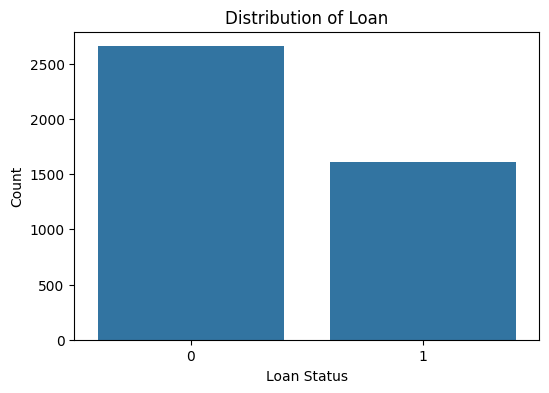

In [69]:
# Distribution of loan status
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=loan)
plt.title('Distribution of Loan')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

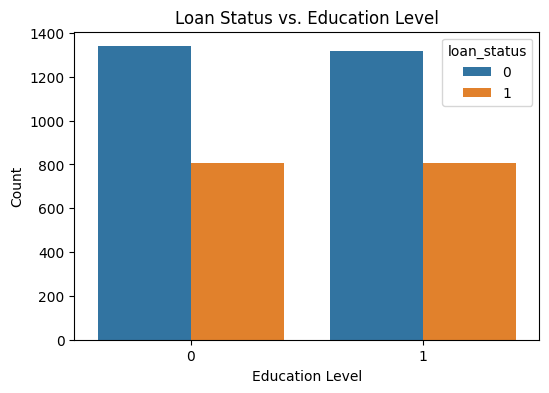

In [60]:
# Relationship between loan status and education level
plt.figure(figsize=(6,4))
sns.countplot(x='education', hue='loan_status', data=loan)
plt.title('Loan Status vs. Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()

<a id ="14"></a>
## Hist Plot

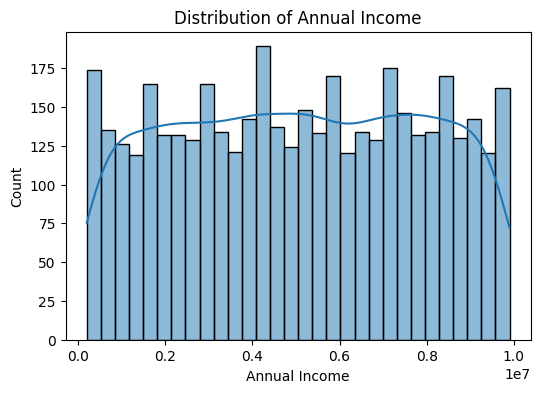

In [57]:
# Distribution of annual income
plt.figure(figsize=(6,4))
sns.histplot(loan['income_annum'], kde=True, bins=30)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()

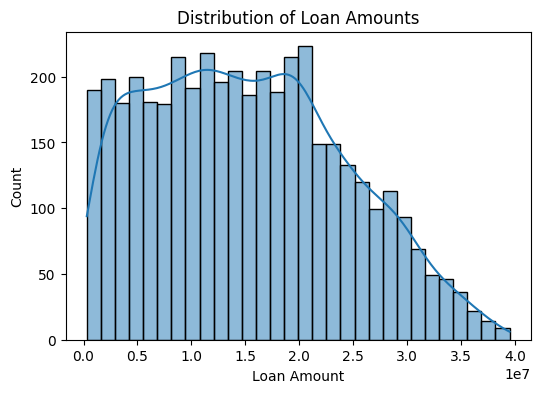

In [58]:
# Distribution of loan amounts
plt.figure(figsize=(6,4))
sns.histplot(loan['loan_amount'], kde=True, bins=30)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

<a id ="15"></a>
## Box Plot

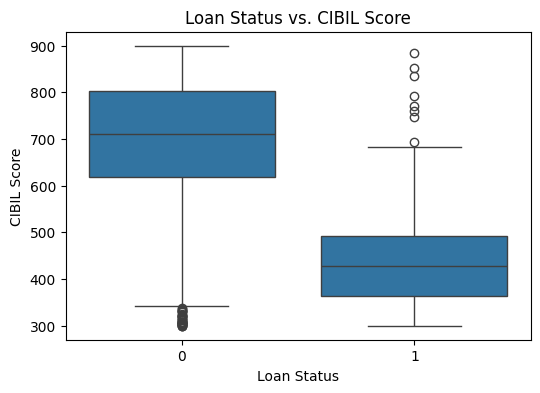

In [59]:
# Relationship between loan status and cibil score
plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status', y='cibil_score', data=loan)
plt.title('Loan Status vs. CIBIL Score')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')
plt.show()